# Week 7, Mon, 5/12


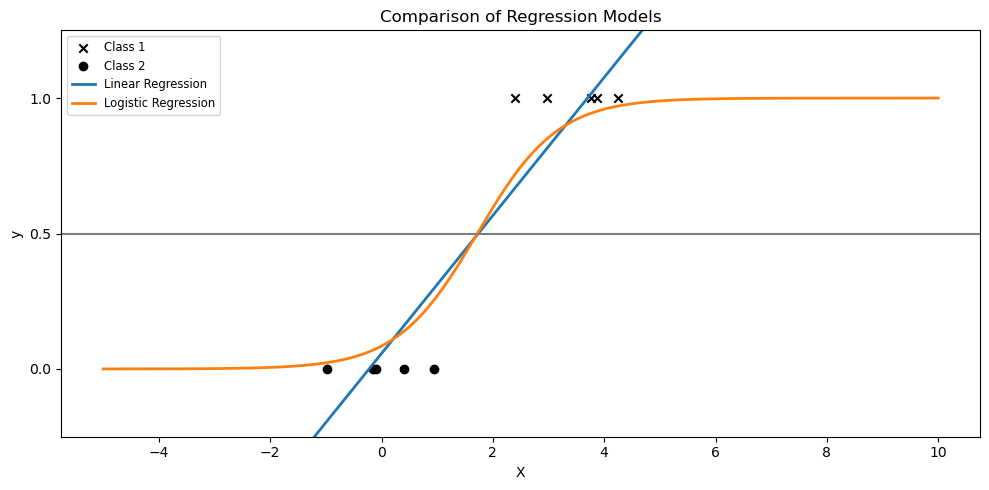

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set seed for reproducibility
np.random.seed(0)

# Generate a toy dataset
N = 5
x_class1 = np.random.normal(2, 1, N)
x_class2 = np.random.normal(0, 1, N)

y_class1 = np.ones(N)
y_class2 = np.zeros(N)


# Features and labels, with and without outlier
X = np.concatenate((x_class1, x_class2)).reshape(-1, 1)
y = np.concatenate((y_class1, y_class2))

# Fit linear regression
ols = LinearRegression()
ols.fit(X, y)

# Fit logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# Generate test data for plotting
X_test = np.linspace(-5, 10, 300).reshape(-1, 1)
y_test = ols.predict(X_test)
logistic_prob = sigmoid(clf.coef_ * X_test + clf.intercept_)

# Plotting
plt.figure(figsize=(10, 5))

# plot data
plt.scatter(x_class1, y_class1, label='Class 1', marker='x', color='k')
plt.scatter(x_class2, y_class2, label='Class 2', marker='o', color='k')

# Without extra points
plt.plot(X_test, y_test, label="Linear Regression", linewidth=2)
plt.plot(X_test, logistic_prob, label="Logistic Regression", linewidth=2)


plt.title("Comparison of Regression Models")
plt.axhline(0.5, color=".5")
plt.ylabel("y")
plt.xlabel("X")
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.legend(loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Feature 2')

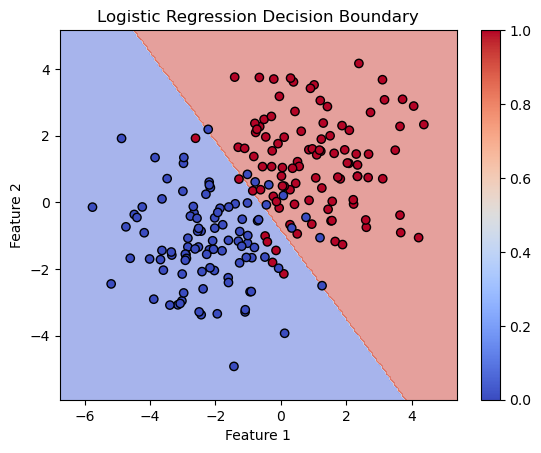

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples per class
N = 100

# Generate data: class 1 centered at (2, 2), class 2 centered at (-2, -2)
x_class1 = np.random.multivariate_normal([1, 1], 2*np.eye(2), N)
x_class2 = np.random.multivariate_normal([-2, -1], 2*np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2))
y = np.concatenate((np.ones(N), np.zeros(N)))

# Create a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    # response_method="predict_proba",  # Can be "predict_proba" for probability contours
    response_method="predict",
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)
# Scatter plot of the data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

# Adding color bar
cbar = plt.colorbar(scatter, ax=ax)
# Adding title and labels
ax.set_title('Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

